# 读取数据

In [1]:
from instrument import read_bunch
from sklearn.datasets.base import Bunch
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. load data from local
train_bunch_path = './data_bunch/train_bunch.dat'
validate_bunch_path = './data_bunch/validate_bunch.dat'
train_bunch = read_bunch(train_bunch_path)
validate_bunch = read_bunch(validate_bunch_path)

# 读取停用词

In [2]:
# 2. stop words list
stop_words_path = './NLP/stop_words/stopword.txt'
with open(stop_words_path, 'r', encoding='utf-8') as sowd:
    StopWords = [line.strip() for line in sowd.readlines()]
stop_words = list(set(StopWords))
stop_words_list = None

# 创建 IF-IDF 词向量空间

In [3]:
max_df = 0.8

# 3.create TF-IDF words vector space with train data
tfidf_train = Bunch(Id=train_bunch.news_id, Label=train_bunch.news_pic_label, tdm=[], vocabulary={})
train_vectorizer = TfidfVectorizer(stop_words=stop_words_list, sublinear_tf=True, max_df=max_df)
tfidf_train.tdm = train_vectorizer.fit_transform(train_bunch.news_words_jieba)   # jieba 分词结果或
tfidf_train.vocabulary = train_vectorizer.vocabulary_

# 4.create TF-IDF words vector space with validate data
tfidf_validate = Bunch(Id=validate_bunch.news_id, tdm=[], vocabulary={})
tfidf_validate.vocabulary = tfidf_train.vocabulary
validate_vectorizer = TfidfVectorizer(stop_words=stop_words_list, sublinear_tf=True, max_df=max_df,
                                      vocabulary=tfidf_train.vocabulary)
tfidf_validate.tdm = validate_vectorizer.fit_transform(validate_bunch.news_words_jieba)        # jieba 分词结果

# 基于训练集训练模型

In [4]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

classifier_naive_bayes = MultinomialNB(alpha=0.1453)

## 1. cross validation
x_train, x_test, y_train, y_test = train_test_split(tfidf_train.tdm,
                                                    tfidf_train.Label,
                                                    test_size=0.3,
                                                    random_state=33)

## 2. train model
classifier_naive_bayes.fit(x_train, y_train)
y_predict = classifier_naive_bayes.predict(x_test)

## 3. compute accuracy on test data
from sklearn.metrics import classification_report
print('The accuracy of Naive Bayes model on trainset is :',
      classifier_naive_bayes.score(x_test, y_test))
print(classification_report(y_test, y_predict))

The accuracy of Naive Bayes model on trainset is : 0.6617161716171617
             precision    recall  f1-score   support

          0       0.68      0.79      0.73      7192
          1       0.40      0.03      0.05      2357
          2       0.65      0.78      0.71      4995

avg / total       0.62      0.66      0.61     14544



# 对验证集进行预测

In [28]:
# predict the label with validate data
from sklearn.naive_bayes import MultinomialNB
classifier_naive_bayes = MultinomialNB(alpha=0.1453)

classifier_naive_bayes.fit(tfidf_train.tdm, tfidf_train.Label)
label_predict = classifier_naive_bayes.predict(tfidf_validate.tdm)

# 7. store the result of predict to local, and ust it to submittion
bayes_text = []
for i in range(len(validate_bunch.news_id)):
    bayes_text.append('NULL')

bayes_result = []
for i in range(len(validate_bunch.news_id)):
    bayes_result.append(validate_bunch.news_id[i]+'\t'+label_predict[i]+'\t'+bayes_text[i]+'\t'+bayes_text[i])

ValueError: Found input variables with inconsistent numbers of samples: [33936, 48480]

# 将预测结果保存为本地的tx文件用以提交

In [ ]:
from instrument import save_text

save_path = './result_feature.txt'
save_text(save_path, bayes_result)

# 测试特征选择的结果

[0.68744091 0.69819607 0.70491438 0.70839152 0.71107315 0.71213411
 0.71316562 0.71534626 0.71643666 0.71690807 0.71802785 0.71846985
 0.71858773 0.71902966 0.71905906 0.71935376 0.7189707  0.71961895
 0.71920635 0.71858744 0.71820439 0.71823381 0.7181454  0.71770342
 0.71717297 0.71729089 0.71667205 0.71620063 0.71614171 0.71558185
 0.71508097 0.71434439 0.7134309  0.71266471 0.71219322 0.71172173
 0.71119132 0.7104252  0.70962957 0.70951169 0.70927594 0.70789093
 0.70733099 0.70650584 0.70541553 0.7050914  0.70461993 0.7045021
 0.70382429 0.7031466  0.70238044 0.70208582 0.70126073 0.70075983
 0.69981687 0.69937486 0.69857925 0.69754798 0.69728281 0.69633987
 0.69569162 0.69498435 0.69442449 0.69362892 0.69268604 0.69189041
 0.69112422 0.69065281 0.68965085 0.68897317 0.68826594 0.68761762
 0.68688097 0.68602637 0.6849655  0.68378689 0.68281453 0.68210731
 0.68089917 0.68039825 0.67833548 0.67762825 0.67733364 0.67730419
 0.67745152 0.67762825 0.67762825 0.67762825 0.67762831 0.67748

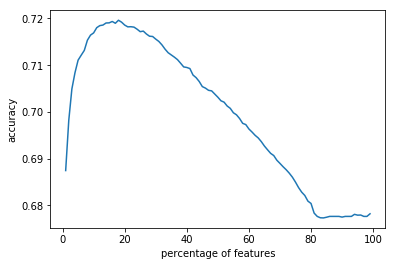

In [2]:
stop_words_list = None
max_df = 0.8

# create TF-IDF words vector space with train data
tfidf_train = Bunch(Id=train_bunch.news_id, Label=train_bunch.news_pic_label, tdm=[], vocabulary={})
train_vectorizer = TfidfVectorizer(stop_words=stop_words_list, sublinear_tf=True, max_df=max_df)
tfidf_train.tdm = train_vectorizer.fit_transform(train_bunch.news_words_jieba)   # jieba 分词结果或
tfidf_train.vocabulary = train_vectorizer.vocabulary_

# create TF-IDF words vector space with validate data
tfidf_validate = Bunch(Id=validate_bunch.news_id, tdm=[], vocabulary={})
tfidf_validate.vocabulary = tfidf_train.vocabulary
validate_vectorizer = TfidfVectorizer(stop_words=stop_words_list, sublinear_tf=True, max_df=max_df,
                                      vocabulary=tfidf_train.vocabulary)
tfidf_validate.tdm = validate_vectorizer.fit_transform(validate_bunch.news_words_jieba)        # jieba 分词结果

# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

model_naive_bayes = MultinomialNB(alpha=0.1453)

## cross validation
x_train, x_test, y_train, y_test = train_test_split(tfidf_train.tdm,
                                                    tfidf_train.Label,
                                                    test_size=0.3,
                                                    random_state=33)


## feature percentage
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
import numpy as np

percentiles = range(1, 100, 1)
results = []
for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = cross_val_score(model_naive_bayes, x_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())
print(results)

# 找到实现最佳性能的特征筛选百分比
opt = np.where(results == results.max())[0]
print('Optimal number of features %d' % percentiles[opt[0]])

import matplotlib
%matplotlib inline
import pylab as pl
pl.plot(percentiles, results)
pl.xlabel('percentage of features')
pl.ylabel('accuracy')
pl.show()